## Workflow to analyze pyControl data

```batch script
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221010_1255500_workflow_pyCon_CuedUncuedAll.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221010_1255500_workflow_pyCon_CuedUncuedAll"
```

### Imports

In [1]:
# Import Session and Experiment class with helper functions
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

### Variables

In [2]:
import pandas as pd

trial_window = [-2000, 6000] # in ms


# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder, _ = os.path.split(os.path.split(os.getcwd())[0])

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params/tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [3]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


# Optional

1m 7s

In [4]:
photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

root_folders = [photo_root_dir, pycontrol_root_dir]
horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

copy_files_to_horizontal_folders(
    root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)


T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC296PR-2022-06-14-155725.txt
T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC296PR-2022-06-14-163241.txt
T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC296PR-2022-06-14-171656.txt
T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC302LS-2022-06-14-171717.txt
T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC302LS-2022-06-14-171822.txt
T:\Data\head-fixed\pycontrol\lick_go_nogo_unconditionned\JC302LS-2022-06-14-172112.txt
T:\Data\head-fixed\pycontrol\reaching_gonogo_sinusoid\00-2022-05-30-141104.txt
T:\Data\head-fixed\pycontrol\reaching_gonogo_sinusoid\JC299LS-2022-05-30-142248.txt
T:\Data\head-fixed\pycontrol\reaching_gonogo_sinusoid\JC299LS-2022-05-31-104454.txt


### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [5]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
# pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

Saved sessions loaded from: sessions.pkl


## retain only pavlovian sessions

In [6]:
exp_cohort.sessions = exp_cohort.get_sessions(task_names='reaching_go_spout_cued_uncued')
# exp_cohort.save()
len(exp_cohort.sessions )

221

### Perform extraction of behavioural information by trial

3m 7.6s

In [7]:
# Process the whole experimental folder by trials
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, 
  blank_spurious_event='spout', blank_timelim=[0, 65])

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

reaching_go_spout_cued_uncued 41 2022-05-11 17:30:36 25 29
reaching_go_spout_cued_uncued 42 2022-05-11 17:32:14 5 0
reaching_go_spout_cued_uncued 42 2022-05-11 17:47:30 38 3
reaching_go_spout_cued_uncued 43 2022-05-11 19:24:51 34 57
reaching_go_spout_cued_uncued 44 2022-05-11 19:24:51 22 37
reaching_go_spout_cued_uncued 45 2022-05-11 19:27:52 25 55
reaching_go_spout_cued_uncued 41 2022-05-12 15:28:29 33 105
reaching_go_spout_cued_uncued 42 2022-05-12 15:33:00 44 88
reaching_go_spout_cued_uncued 43 2022-05-12 16:32:18 51 61
reaching_go_spout_cued_uncued 44 2022-05-12 16:32:18 30 40
reaching_go_spout_cued_uncued 45 2022-05-12 16:37:28 11 0
reaching_go_spout_cued_uncued 45 2022-05-12 16:54:09 5 2
reaching_go_spout_cued_uncued 41 2022-05-16 13:21:21 3 0
reaching_go_spout_cued_uncued 46 2022-05-16 13:21:21 4 0
reaching_go_spout_cued_uncued 41 2022-05-16 13:27:41 1 0
reaching_go_spout_cued_uncued 46 2022-05-16 13:27:41 1 0
reaching_go_spout_cued_uncued 41 2022-05-16 13:30:31 29 23
reaching_g

In [8]:
len(exp_cohort.sessions)

187

In [9]:
exp_cohort.sessions[1].df_events.head(50)

,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time,hold_start_trial_time
trial_nb,,,,,,,,
1,3952,cued,True,False,[],[],[],[10022]
2,17861,cued,True,False,[],[],[],[11037]
3,33579,cued,True,False,[],[],[],[10952]
4,48880,cued,True,False,[],[],[],[10278]
5,64024,cued,True,False,[],[],[],[10397]
6,77067,cued,True,False,[],[],[2498],[5510]
7,87495,cued,True,False,[],[],[],[10375]
8,101267,cued,True,False,[],[],[],[10415]
9,115738,cued,True,False,[],[],[],[10304]


### Define conditions and groups for extraction

#### Cued/Uncued

In [10]:
# List of uncued conditions as listed on the tasks .csv file for task reaching_go_spout_cued_uncued:
# free_reward_timer; reward spout cued; reward bar cued; reward bar_off; reward spout uncued; reward bar uncued; reward free; reward free_uncued

# Many combinations possible
conditions_dict0 = {'trigger': 'cued', 'valid': True,
                    'reward spout cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict1 = {'trigger': 'cued', 'valid': True,
                    'reward bar cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict2 = {'trigger': 'cued', 'valid': True,
                    'reward free': True, 'success': True}
conditions_dict3 = {'trigger': 'cued', 'valid': True, 'success': False}
conditions_dict4 = {'trigger': 'uncued', 'valid': True,
                    'reward spout uncued': True, 'free_reward_timer': False, 'success': True}
conditions_dict5 = {'trigger': 'uncued', 'valid': True,
                    'reward bar uncued': True, 'free_reward_timer': False, 'success': True}
conditions_dict6 = {'trigger': 'uncued', 'valid': True,
                    'reward free_uncued': True}  # reward after [20, 30] s

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1, conditions_dict2, conditions_dict3,
                  conditions_dict4, conditions_dict5, conditions_dict6]
# Aliases for conditions
cond_aliases = [
    'Cued, reward at spout, hit',
    'Cued, reward at bar release, hit',
    'Cued, Pavlovian, hit', # not clean 
    'Cued, miss', # dodgy
    'Uncued, reward at spout, hit',
    'Uncued, reward at bar release, hit',
    'Uncued, miss'] # dodgy

# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)

trial_window = [-2000, 6000]


In [11]:
exp_cohort.sessions

Behaviour: Create a dataset

In [12]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
    task_names='reaching_go_spout_cued_uncued',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)


Behaviour: Compute distribution

In [13]:
dist_as_continuous = ev_dataset.compute_distribution(
    trial_window=trial_window,
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
dist_as_continuous.filterout_subjects([0,1])


### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [14]:
# # Get a list of the groups
# dist_as_continuous.get_groups()
# # Get a list of the variables
# dist_as_continuous.get_col_names()

# # reset previous filtering of the dataset
# dist_as_continuous.filter_reset()

# # exclude some conditions by IDs
# dist_as_continuous.filterout_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filterout_groups([])

# # exclude some subjects
# dist_as_continuous.filterout_subjects([0, 1])
# #     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# # filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# # To remove subjects who do not have trials
# # in all the conditions, if called after filter_min(),
# # will discard any subject who do not have the minimum number
# # of trials in all the conditions

# # dist_as_continuous.filter_if_not_in_all_cond()


Indicative preview of the behavioural metadata

In [15]:
dist_as_continuous.metadata_df.head(50)

,condition_ID,group_ID,subject_ID,session_nb,bar_trial_time,bar_off_trial_time,spout_trial_time,hold_start_trial_time,trial_ID,bar_dist,bar_off_dist,spout_dist,hold_start_dist,keep
0,0,0,41,11,"[382, 473, 9838, 11433, 25363, 25396, 25725, 2...","[344, 439, 556, 11376, 11455, 25381, 25625, 25...","[881, 954, 1156, 1572, 2418, 2656, 2849, 2875,...","[3446, 3822, 3224, 4519, 3311, 4453, 4896, 346...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,0,0,41,16,"[4564, 8645, 3309, 3517, 3678, 3803, 2578, 742...","[1528, 8229, 286, 3502, 407, 3747, 809, 7116, ...","[1686, 1881, 2101, 2464, 2761, 3345, 3997, 854...","[4525, 3362, 3392, 3136, 3968, 3080, 4265, 348...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,0,0,41,22,"[3590, 3682, 4321, 5616, 9016, 9185, 7611, 804...","[457, 3665, 4297, 940, 8489, 9158, 416, 7662, ...","[632, 720, 772, 1186, 2478, 3388, 3798, 4289, ...","[3757, 5008, 3247, 3716, 4591, 4130, 3536, 428...",2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,0,0,41,23,"[2813, 2877, 1635, 1717, 3481, 3938, 4210, 455...","[438, 2836, 344, 1683, 3457, 3706, 4160, 4327,...","[544, 577, 724, 952, 1182, 1556, 1783, 2414, 4...","[3132, 3715, 2994, 3565, 2807, 3108, 3104, 299...",3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
4,0,0,41,24,"[-1206.0, -1367.0, -1300.0, 3944.0, -1139.0, 2...","[610, 433, 435, 395, 1764, 982]","[712, 810, 1492, 1891, 530, 676, 773, 1474, 17...","[-1100.0, 3946.0, 3245.0, -1072.0, 4535.0, 327...",4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6666666666666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.6666666666666667, 1.66666666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
5,0,0,41,25,"[3989, 4122, 27371, 27560, 27586, 28746, 29343...","[602, 4093, 27355, 27524, 27575, 28710, 29328,...","[1008, 1088, 1160, 1267, 1697, 1956, 2176, 256...","[-1049, 34775, -1091, -1428, -1351, -1114, -1342]",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.6666666666666667, ...",True
6,0,0,41,29,[463],"[422, 511]","[875, 1049, 1470, 2417]",[-1157],6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0,...",True
7,0,0,41,36,"[-1900.0, -1207.0, 3948.0, 9055.0, -1279.0, -1...","[-1222, 1692, 1041, 690, -1890, 1141, -1225, 1...","[1819, 1944, 2113, 2609, 3296, 3482, 1267, 130...","[-1050.0, -1172.0, 3933.0, -1143.0, 4500.0, 36...",7,"[0.9090909090909091, 0.6060606060606061, 0.606...","[0.6060606060606061, 0.30303030303030304, 0.30...","[0.0, 0.6060606060606061, 0.30303030303030304,...","[0.0, 0.0, 0.30303030303030304, 0.0, 0.0, 0.60...",True
8,0,0,41,37,"[-1999.0, 2535.0, 2571.0, -1562.0, -1499.0, 19...","[795, 2550, 478, -1546, 409, 1931, 1957, 375, ...","[1058, 1198, 1395, 1615, 2063, 633, 709, 806, ...","[-1118.0, -1411.0, 3295.0, -1381.0, 3414.0, -1...",8,"[0.38461538461538464, 0.38461538461538464, 0.1...","[0.28846153846153844, 0.28846153846153844, 0.0...","[0.0, 0.38461538461538464, 0.19230769230769232...","[0.19230769230769232, 0.09615384615384616, 0.0...",True
9,0,0,41,39,"[-1481, 2172, 2208, 2351, 2990, 3753, 3949, 39...","[-1531, 1798

## Behaviour: Plot distribution

#TODO what is T = 0?
How to plot differently? Or not necessary?

True    946
Name: keep, dtype: int64

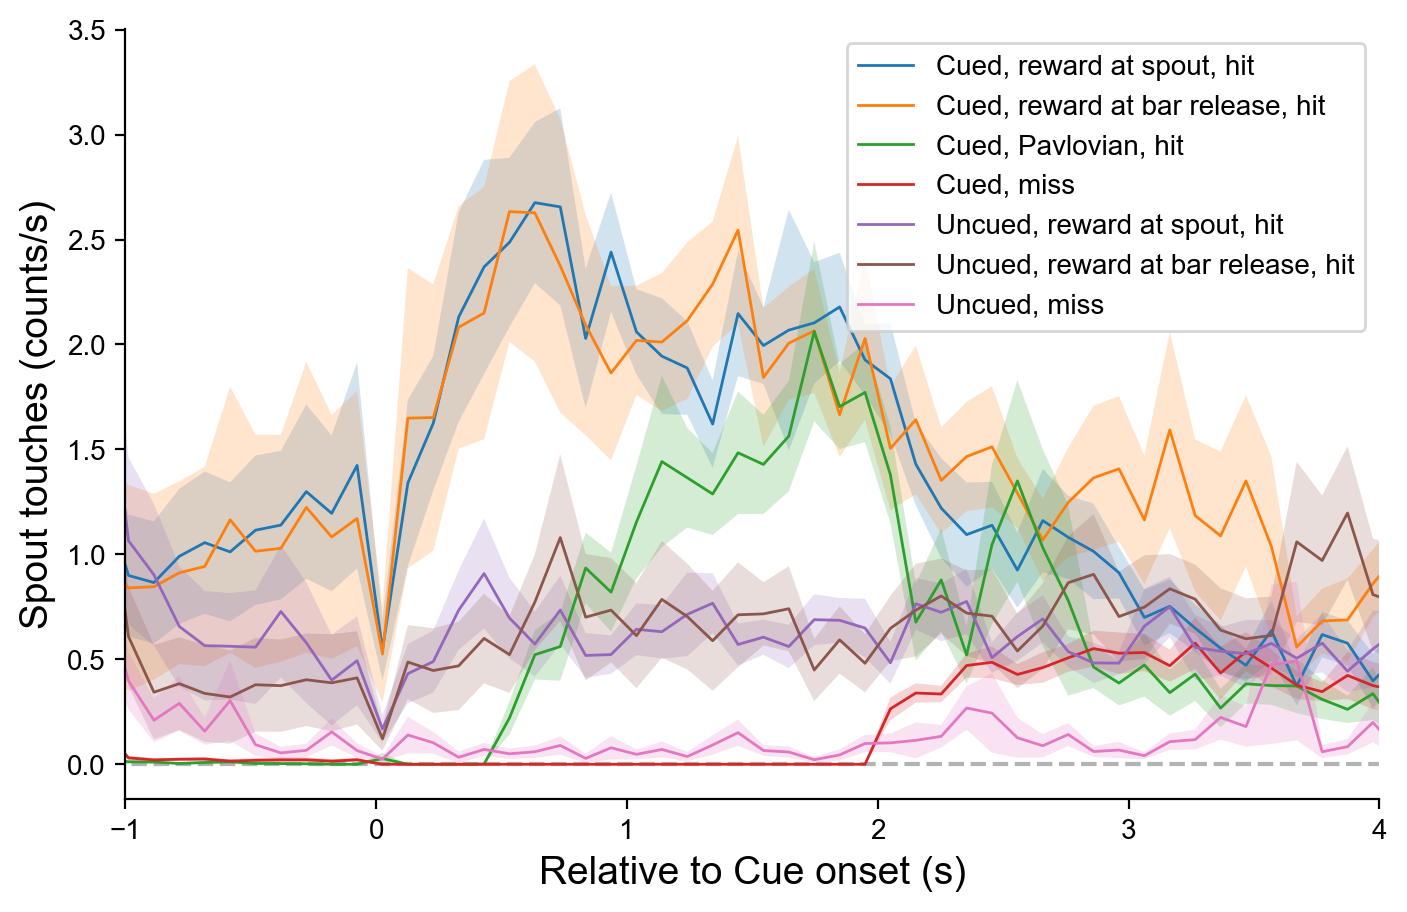

In [16]:

dist_as_continuous.set_trial_window([a/1000 for a in trial_window], 's')

figs, axs, df1 = dist_as_continuous.lineplot(
    vars = [ 'spout_dist'],
    time_lim = [-1,4],
    time_unit='s',
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = cmap10(),
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5*1.618, 5),
    dpi = 200,
    verbose = False)


axs[0, 0].set_xlabel('Relative to Cue onset (s)', fontsize=14) #TODO not sure
axs[0, 0].set_ylabel('Spout touches (counts/s)', fontsize=14) #TODO not sure
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## For presentation

In [17]:
dist_as_continuous = ev_dataset.compute_distribution(
    trial_window=trial_window,
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
dist_as_continuous.filterout_subjects([0,1])

dist_as_continuous.filterout_conditions([1, 2, 4, 5, 6])

    condition_ID  condition_trial_n             condition_alias  group_ID  \
0              0                127  Cued, reward at spout, hit         0   
1              0                127  Cued, reward at spout, hit         0   
2              0                127  Cued, reward at spout, hit         0   
3              0                127  Cued, reward at spout, hit         0   
4              0                127  Cued, reward at spout, hit         0   
5              0                127  Cued, reward at spout, hit         0   
6              0                127  Cued, reward at spout, hit         0   
7              0                127  Cued, reward at spout, hit         0   
8              0                127  Cued, reward at spout, hit         0   
9              0                127  Cued, reward at spout, hit         0   
10             0                127  Cued, reward at spout, hit         0   
11             0                127  Cued, reward at spout, hit         0   

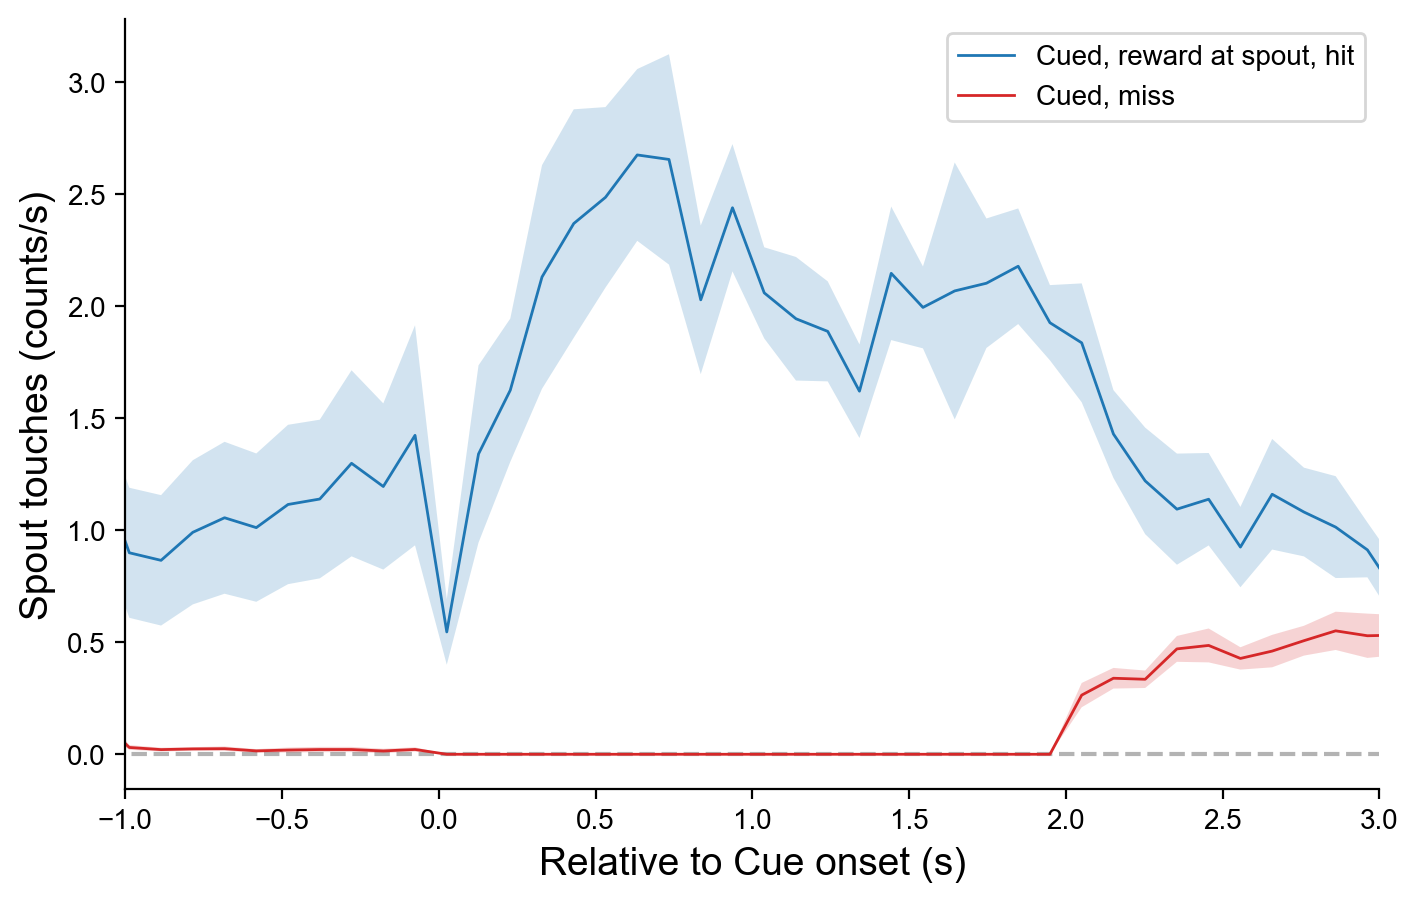

In [18]:

dist_as_continuous.set_trial_window([a/1000 for a in trial_window], 's')

figs, axs, df1 = dist_as_continuous.lineplot(
    vars = [ 'spout_dist'],
    time_lim = [-1,3],
    time_unit='s',
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = cmap10(),
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5*1.618, 5),
    dpi = 200,
    verbose = False)


axs[0, 0].set_xlabel('Relative to Cue onset (s)', fontsize=14) #TODO not sure
axs[0, 0].set_ylabel('Spout touches (counts/s)', fontsize=14) #TODO not sure
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()

print(df1)


# Success rate plots 

## Sessions


Text(0.5, 1.0, 'Uncued')

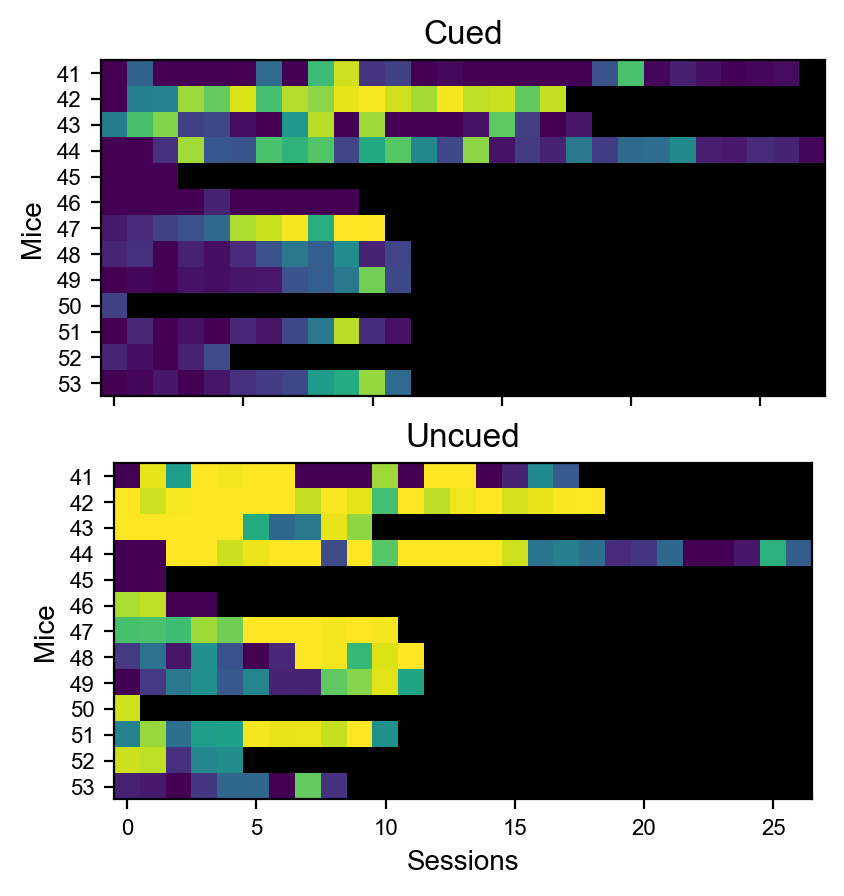

In [19]:

from matplotlib.pyplot import subplots


ev_dataset1 = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset1.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset1.set_conditions(conditions=condition_list, aliases=cond_aliases)

plt.ion()
fig, (ax1, ax2) = subplots(2,1)

bywhat = 'sessions'
gr_df1, out_list1, _, _ = ev_dataset1.analyse_successrate([0], [1,2,3], bywhat=bywhat, ax=ax1)

# print(gr_df1)

# print(out_list1)

ax1.set_title('Cued')
ax1.set_xlabel('')
ax1.xaxis.set_ticklabels([])


gr_df2, out_list2, _, _ = ev_dataset1.analyse_successrate([4],[5,6],
    bywhat=bywhat, ax=ax2)

# print(gr_df2)

# print(out_list2)

ax2.set_title('Uncued')



## sessions with gaps

#TODO Sessions with no trial should be removed and skipped, but still included.

Text(0.5, 1.0, 'Uncued')

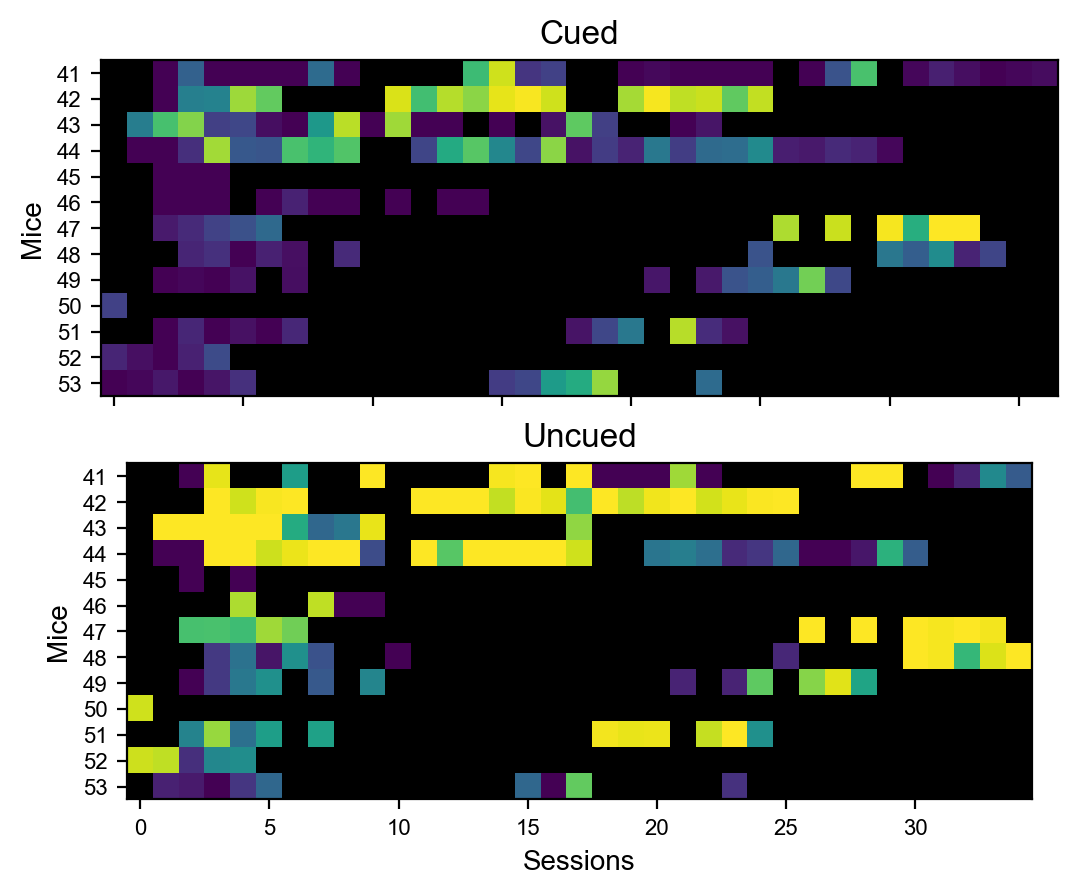

In [26]:

from matplotlib.pyplot import subplots


ev_dataset1 = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset1.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset1.set_conditions(conditions=condition_list, aliases=cond_aliases)

plt.ion()
fig, (ax1, ax2) = subplots(2,1)

bywhat = 'sessions_with_gaps'
gr_df1, out_list1, _, _ = ev_dataset1.analyse_successrate([0], [1,2,3], bywhat=bywhat, ax=ax1)

# print(gr_df1)

# print(out_list1)

ax1.set_title('Cued')
ax1.set_xlabel('')
ax1.xaxis.set_ticklabels([])


gr_df2, out_list2, _, _ = ev_dataset1.analyse_successrate([4],[5,6],
    bywhat=bywhat, ax=ax2)

# print(gr_df2)

# print(out_list2)

ax2.set_title('Uncued')



## Days

- xlim needs to be matched between plots

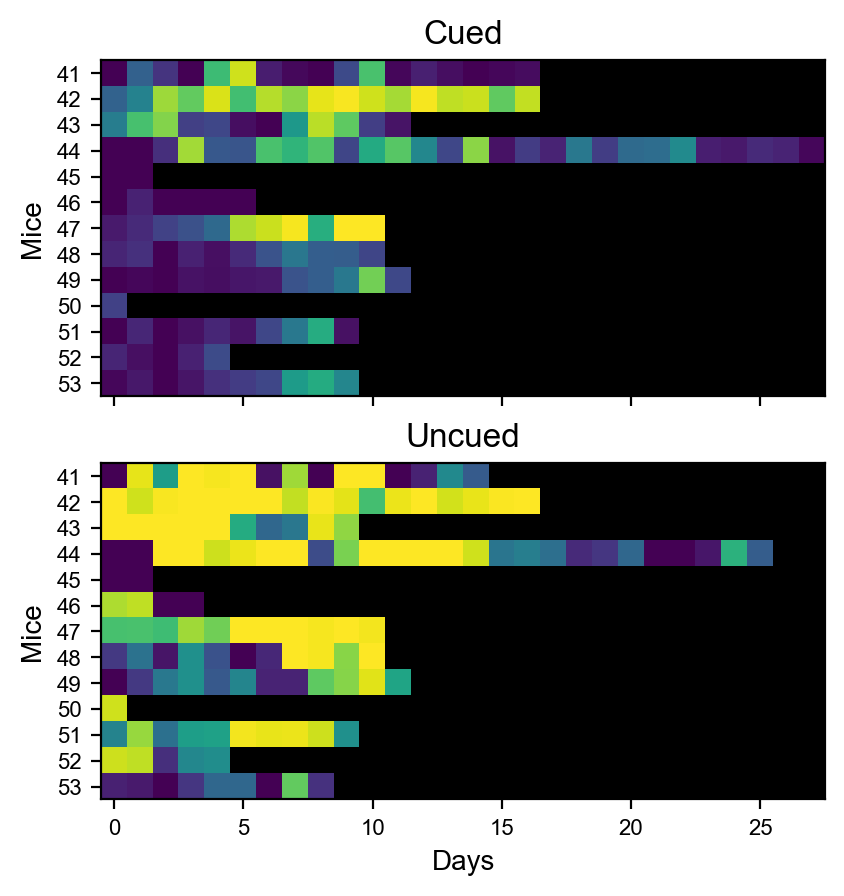

In [22]:

from matplotlib.pyplot import subplots


ev_dataset1 = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset1.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset1.set_conditions(conditions=condition_list, aliases=cond_aliases)

plt.ion()
fig, (ax1, ax2) = subplots(2,1)


gr_df1, out_list1, _, _ = ev_dataset1.analyse_successrate([0], [1,2,3], bywhat='days', ax=ax1)

# print(gr_df1)

# print(out_list1)

ax1.set_title('Cued')
ax1.set_xlabel('')
ax1.xaxis.set_ticklabels([])

gr_df2, out_list2, _, _ = ev_dataset1.analyse_successrate([4],[5,6],
    bywhat='days', ax=ax2)

# print(gr_df2)

# print(out_list2)

ax2.set_title('Uncued')

xlim1 = ax1.get_xlim()
xlim2 = ax2.get_xlim()

if max(xlim1) > max(xlim2):
    ax2.set_xlim(xlim1)
else:
    ax1.set_xlim(xlim2)




## Days with gaps

Text(0.5, 1.0, 'Uncued')

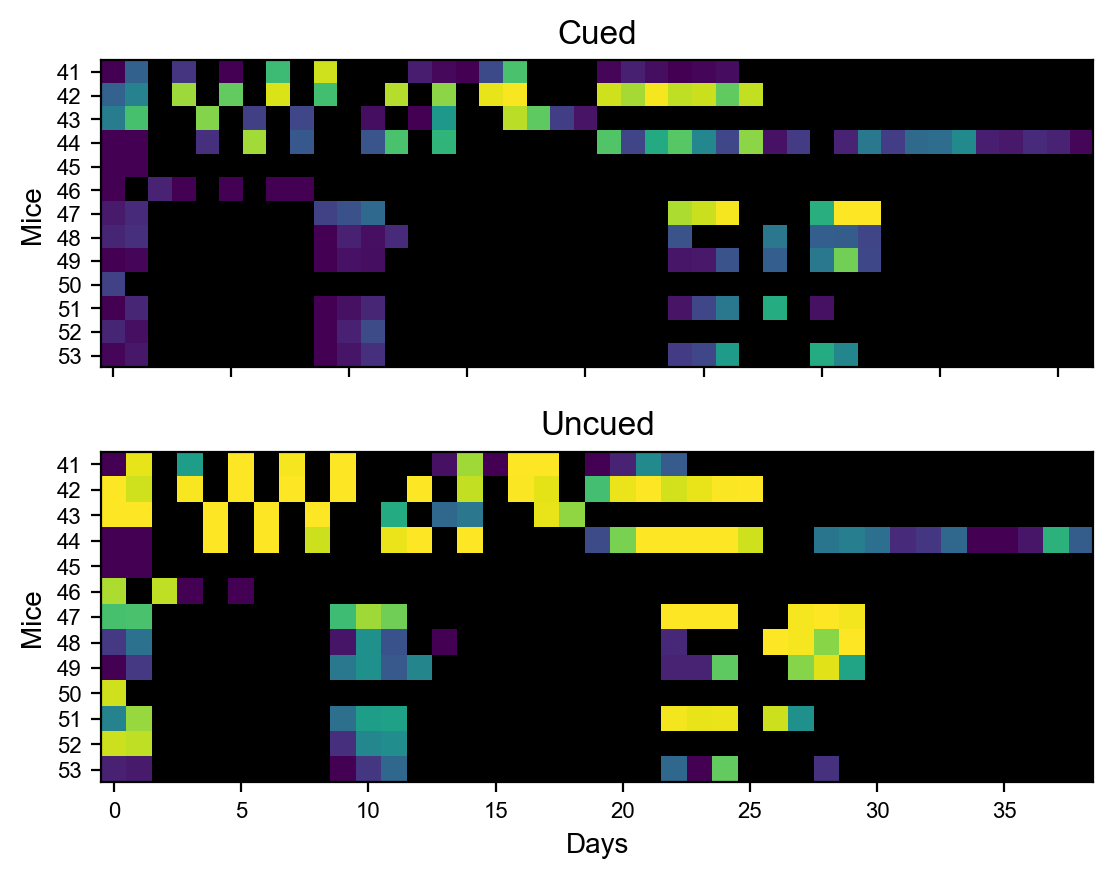

In [23]:

from matplotlib.pyplot import subplots


ev_dataset1 = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset1.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset1.set_conditions(conditions=condition_list, aliases=cond_aliases)

plt.ion()
fig, (ax1, ax2) = subplots(2,1)


gr_df1, out_list1, _, _ = ev_dataset1.analyse_successrate(
    [0], [1, 2, 3], bywhat='days_with_gaps', ax=ax1)

# print(gr_df1)

# print(out_list1)

ax1.set_title('Cued')
ax1.set_xlabel('')
ax1.xaxis.set_ticklabels([])


gr_df2, out_list2, _, _ = ev_dataset1.analyse_successrate([4],[5,6],
    bywhat='days_with_gaps', ax=ax2)

# print(gr_df2)

# print(out_list2)

ax2.set_title('Uncued')



## Dates

Text(0.5, 1.0, 'Uncued')

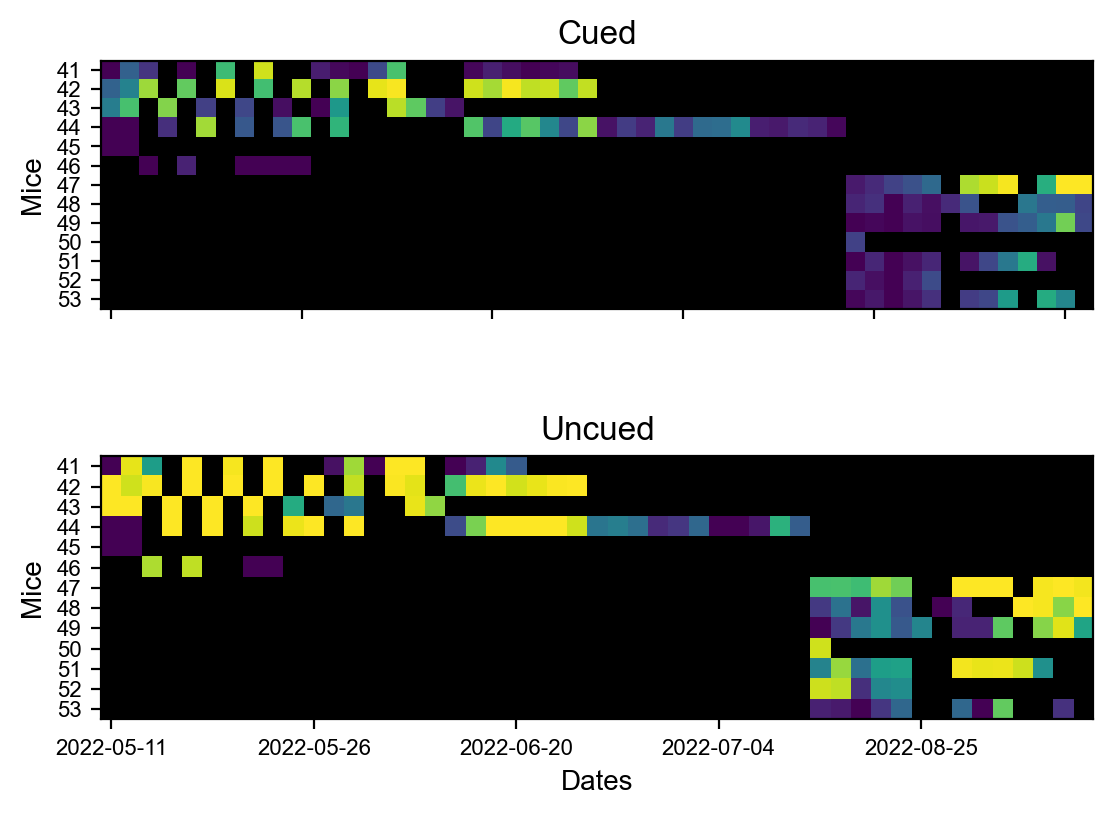

In [24]:

from matplotlib.pyplot import subplots


ev_dataset1 = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset1.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset1.set_conditions(conditions=condition_list, aliases=cond_aliases)

plt.ion()
fig, (ax1, ax2) = subplots(2,1)


gr_df1, out_list1, _, _ = ev_dataset1.analyse_successrate([0], [1,2,3], bywhat='dates', ax=ax1)

# print(gr_df1)

# print(out_list1)

ax1.set_title('Cued')
ax1.set_xlabel('')
ax1.xaxis.set_ticklabels([])


gr_df2, out_list2, _, _ = ev_dataset1.analyse_successrate([4],[5,6],
    bywhat='dates', ax=ax2)

# print(gr_df2)

# print(out_list2)

ax2.set_title('Uncued')

